In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None)

In [3]:
df.sample(4)

,0,1,2,3,4,5
546141,0,2201667631,Tue Jun 16 20:36:05 PDT 2009,NO_QUERY,hxcmelolee,wondering when i'll get a break
1153439,4,1978823612,Sun May 31 00:35:37 PDT 2009,NO_QUERY,galvis,Hello sunday going to work ...
1071929,4,1966412787,Fri May 29 17:43:15 PDT 2009,NO_QUERY,neekybabyy,HOLLYWOOD here i come
58598,0,1685940588,Sun May 03 02:53:56 PDT 2009,NO_QUERY,icedcoffee,@kesouthall belfast is good. nice and sunny. c...


In [4]:
# Rename columns for clarity
df.columns = ["sentiment", "id", "date", "query", "username", "text"]

In [5]:
df.sample(4)

,sentiment,id,date,query,username,text
174333,0,1964459501,Fri May 29 14:16:09 PDT 2009,NO_QUERY,0BS0L33T,@PDX_Grenade The link 404'd.
1560532,4,2186360864,Mon Jun 15 18:43:45 PDT 2009,NO_QUERY,FOODAYZ,@tysonritteraar I just found out you guys are ...
987069,4,1834625869,Mon May 18 03:38:41 PDT 2009,NO_QUERY,lollipopOh9,revealing my secret to isabel
721307,0,2261155594,Sat Jun 20 20:20:56 PDT 2009,NO_QUERY,kidvai,@rabayl thx. switching to firefox just for thi...


In [ ]:
# Keep only relevant columns
df = df[["sentiment", "text"]]

In [7]:
# Convert sentiment values (0 = Negative, 4 = Positive)
df["sentiment"] = df["sentiment"].replace({0: "negative", 4: "positive"})

In [8]:
# Display sample data
print(df.head())

  sentiment                                               text
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....


In [12]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df["clean_text"] = df["text"].apply(clean_text)

print(df["clean_text"].head())

0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: clean_text, dtype: object


In [ ]:
mental_health_labels = {
    "depression": ["sad", "hopeless", "worthless", "suicidal", "empty", "drained", "numb", "exhausted", "lonely", "failure"],
    "anxiety": ["nervous", "worried", "panic", "overthinking", "restless", "can't sleep", "racing thoughts", "overwhelmed"],
    "bipolar": ["manic", "mood swing", "euphoric", "hyper", "impulsive", "depressed", "extreme high"],
    "ptsd": ["trauma", "flashback", "nightmare", "triggered", "on edge", "can't forget", "disturbing memories"],
    "sad": ["seasonal", "winter blues", "dark months", "low energy", "sleepy", "feel down"],
    "schizophrenia": ["delusion", "hallucination", "paranoid", "hearing voices", "unreal", "out of touch"],
    "eating_disorder": ["anorexia", "bulimia", "overeating", "food guilt", "binge eating", "calories", "starving"],
}

In [11]:
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
def assign_label(text):
    for label, keywords in mental_health_labels.items():
        if any(keyword in text for keyword in keywords):
            return label
    return "none"  # If no label is found

In [14]:
# Apply cleaning and labeling
df["cleaned_text"] = df["text"].apply(clean_text)
df["mental_health_label"] = df["cleaned_text"].apply(assign_label)

In [38]:
df.sample(5)

,sentiment,text,clean_text,cleaned_text,mental_health_label
144808,negative,Is not going Download,going download,going download,none
384223,negative,pornbats where u at? i miss u guys.,pornbats u miss u guys,pornbats u miss u guys,none
555171,negative,@shawneiora Been sad lately. Just found out my...,sad lately found sister stage 1 colon cancer a...,sad lately found sister stage 1 colon cancer a...,depression
1039930,positive,Im still studying and nothing is making sense....,im still studying nothing making sense got yea...,im still studying nothing making sense got yea...,none
1591526,positive,@PaceyGorilla (clears throat nervously) Erm..y...,clears throat nervously ermyesand im really be...,clears throat nervously ermyesand im really be...,anxiety


In [40]:
df["category"] = df["clean_text"].apply(assign_label)

In [41]:
df = df[df["category"] != "other"]  # Remove unrelated tweets

In [81]:
df.sample(10)

,sentiment,text,clean_text,cleaned_text,mental_health_label,category
1026119,positive,@eilla going by your tweets there should be to...,going tweets tons write tip write draft langua...,going tweets tons write tip write draft langua...,none,none
7670,negative,"has no internet access and needs an iPhone, cl...",internet access needs iphone clearly keep twit...,internet access needs iphone clearly keep twit...,none,none
1459460,positive,@Jonasbrothers For you Nick!! http://bit.ly/t...,nick,nick,none,none
342467,negative,Woke up to a screaming cat(s). Mine looks fine...,woke screaming cats mine looks fine limping im...,woke screaming cats mine looks fine limping im...,depression,depression
665187,negative,Last day of tennis.,last day tennis,last day tennis,none,none
59302,negative,@bobklv yes but the work week in the UAE (and ...,yes work week uae gulf nations sunthu fri musl...,yes work week uae gulf nations sunthu fri musl...,none,none
1337478,positive,"Class Action accuses LV strip clubs, cabs of R...",class action accuses lv strip clubs cabs rico ...,class action accuses lv strip clubs cabs rico ...,none,none
209632,negative,i had a dream that my lv nails fell off and i ...,dream lv nails fell sad,dream lv nails fell sad,depression,depression
64037,negative,My nails were broken ! accidentally ! *sob* i...,nails broken accidentally sob im sooo pissed,nails broken accidentally sob im sooo pissed,none,none
203344,negative,"I'm in a time warp, listening to The Carter (T...",im time warp listening carter original weezy w...,im time warp listening carter original weezy w...,none,none


NameError: name 'mental_health_labels' is not defined

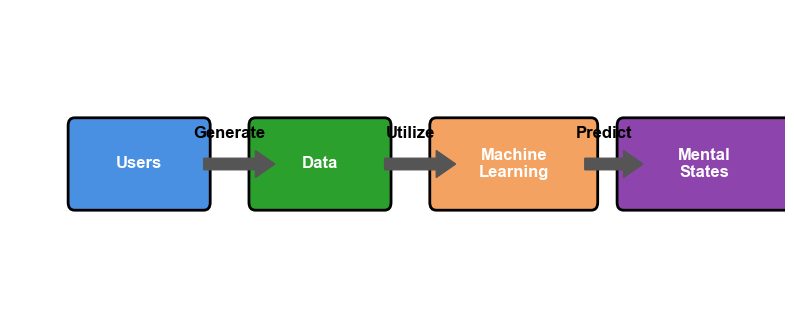